# Aplicação de métodos de data mining em dois datasets de dados reais. Geração de conhecimento e visualização inteligente.

## Importação de Bibliotecas

Este bloco é dedicado à importação de todas as bibliotecas necessárias para o projeto. Cada biblioteca tem um propósito específico que é brevemente explicado abaixo:


In [1]:
import pandas as pd             # Para manipulação e análise de dados
import numpy as np              # Para operações numéricas e matriciais
import matplotlib.pyplot as plt # Para a criação de gráficos e visualizações
import seaborn as sns           # Para gráficos estatísticos mais atraentes

# scikit-learn: Biblioteca para machine learning
from sklearn.model_selection import train_test_split                                # Dividir os dados em conjuntos de treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer        # Para converter texto em um formato vetorizado para modelos de ML
from sklearn.linear_model import LogisticRegression                                 # Modelo de regressão logística para classificação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas para avaliar o desempenho dos modelos
from sklearn.ensemble import RandomForestClassifier                                 # Modelo de classificador baseado em florestas de árvores de decisão
from sklearn.svm import SVC                                                         # Máquinas de vetores de suporte para classificação


## Aplicação de Estilos na Visualização dos Dados

Aqui ajusto a visualização dos dados no DataFrame para facilitar a análise e interpretação visual.

In [ ]:
# Carregar os dados
data = pd.read_csv('climate.csv')

# Converter o 'datetime' para datetime // no csv vem como object
data['datetime'] = pd.to_datetime(data['datetime'])

# Ajustar a largura máxima da coluna de texto para visualização completa
pd.set_option('display.max_colwidth', None)

# Função para aplicar cor baseada no "senscore"
def color_negative_red(value):
    """
    Cores: vermelho para valores negativos, verde para valores positivos e branco para valores neutros.
    """
    if value < 0:
        return 'color: red'
    elif value > 0:
        return 'color: green'
    else:
        return 'color: white'

# Função para aplicar cor baseada no "viewpoint"
def color_viewpoint(value):
    """
    Cores: verde para 'believer', vermelho para 'denier', branco para 'unsure'.
    """
    if value == 'beliver':
        return 'color: green'
    elif value == 'denier':
        return 'color: red'
    elif value == 'unsure':
        return 'color: white'
    else:
        return 'color: black'  # Padrão para qualquer outro valor inesperado

# Aplicar estilo ao DataFrame para visualização
styled_data = data.style.map(color_negative_red, subset=['senscore'])\
                        .map(color_viewpoint, subset=['viewpoint'])
styled_data


# Visualização do topo da tabela

In [3]:
import pandas as pd

# Carregamento dos dados do arquivo CSV
data = pd.read_csv('climate.csv')

# Verificando as primeiras linhas para confirmar o carregamento
data.head()

,datetime,user,text,senscore,viewpoint
0,2011-06-08 11:56:00,Victory Pete,Have you noticed how extreme the weather has become in the last 20 years Snow in Texas Tornados in Massachusetts Heat waves running rampant Drought and wildfires Just watch the news How about how windy it is at the flying field everyday Last year was my first year flying RC airplanes and everyday was windy I could only get a calm flight if I went at sunup And please dont say Al Gore made the whole thing up VP,0.5574,beliver
1,2011-06-08 11:59:00,redhotpearl,I do think burning Fossil Fuels is helping at all if you believe the vast majority of scientists That being said good luck with this topic not to many science majors or even fans around here it seems,0.7964,beliver
2,2011-06-08 12:04:00,debogus,Michael Mann made it up Egore is just a opportunist if you believe I believe a lot of scientist have jumped ship on that one East Anglia emails under the rug cause global warming not to many science majors or even fans around here it seems I not a big fan of scare tactic type manipulation for government funding and control,-0.6769,denier
3,2011-06-08 12:09:00,Victory Pete,I believe Egore is an opportunist but I dont believe anyone made it up except Mankind itself VP,0.0258,beliver
4,2011-06-08 12:16:00,Looooeeee!,Let just say I do think we can rule out entirely the influence that the extra CO2 has on recent global mean temperatures There seems to be a certain amount of fossil record supporting this trend,0.6124,beliver


## Distribuição dos Viewpoints

Aqui visualizamos a distribuição das diferentes categorias de usuários ('believer', 'denier', 'unsure') para entender a proporção de cada categoria no conjunto de dados.


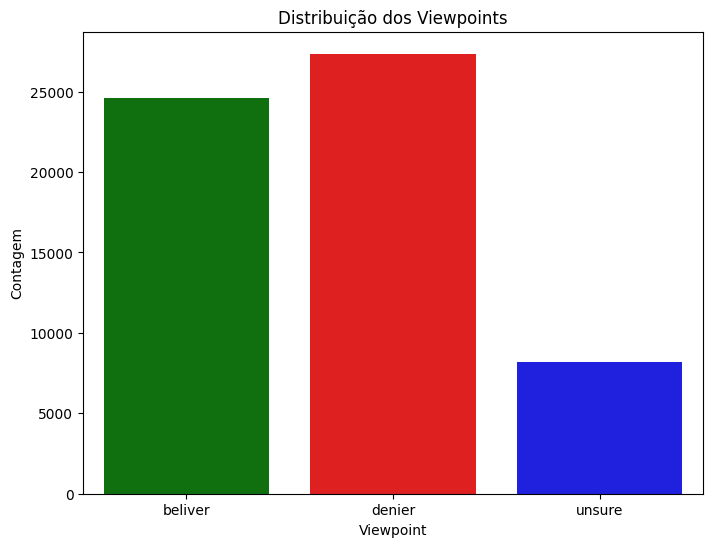

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para a distribuição dos viewpoints
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='viewpoint', hue='viewpoint', palette=['green', 'red', 'blue'])
plt.title('Distribuição dos Viewpoints')
plt.xlabel('Viewpoint')
plt.ylabel('Contagem')
plt.show()


## Histograma do Senscore

Este histograma mostra a distribuição dos valores de senscore em todo o conjunto de dados, fornecendo uma visão geral da polaridade e intensidade dos sentimentos expressos nos posts.


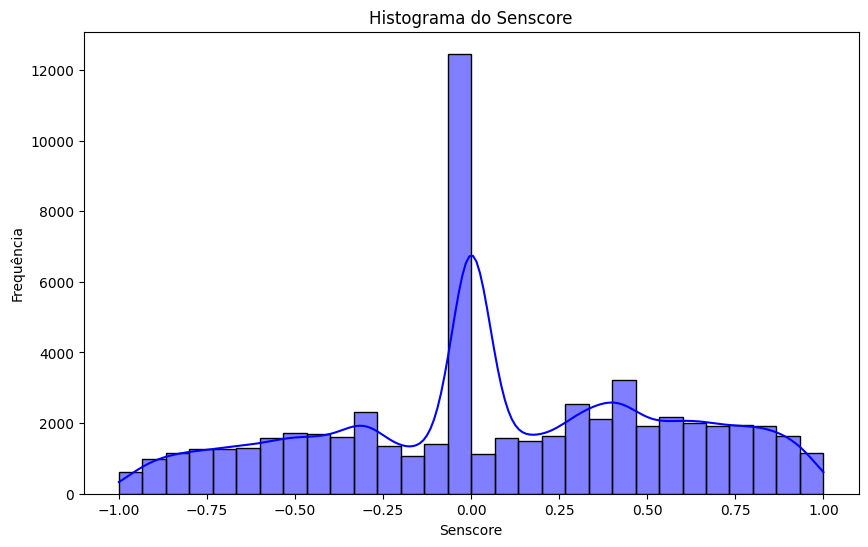

In [6]:
# Histograma para a distribuição do senscore
plt.figure(figsize=(10, 6))
sns.histplot(data['senscore'], bins=30, kde=True, color='blue')
plt.title('Histograma do Senscore')
plt.xlabel('Senscore')
plt.ylabel('Frequência')
plt.show()


## Transformação dos Textos em Vetores TF-IDF

Primeiro, transformamos os textos dos posts do fórum em uma matriz de características TF-IDF. Isso nos ajuda a quantificar a importância de cada palavra nos textos relativamente à coleção de documentos (todos os posts). Utilizamos `TfidfVectorizer` do scikit-learn, limitando o número de features para reduzir o vocabulário e simplificar os cálculos subsequentes.


In [13]:
# Preenchendo valores NaN com uma string vazia
data['text'] = data['text'].fillna('')

# Continuação da transformação TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciando o TfidfVectorizer com um limite de 1000 features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['text'])


## Aplicação do K-Means Clustering

Utilizamos o algoritmo K-Means para agrupar os textos em clusters. Neste exemplo, escolhemos agrupar os textos em 3 clusters.


In [14]:
from sklearn.cluster import KMeans

# Aplicação do K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

## Redução de Dimensionalidade e Visualização

Para visualizar os clusters em um espaço bidimensional, utilizamos PCA para reduzir a dimensionalidade dos dados. Isso permite uma fácil interpretação visual dos clusters. Cada cluster é colorido de forma distinta para indicar a categoria presumida dos usuários: vermelho, verde e azul.


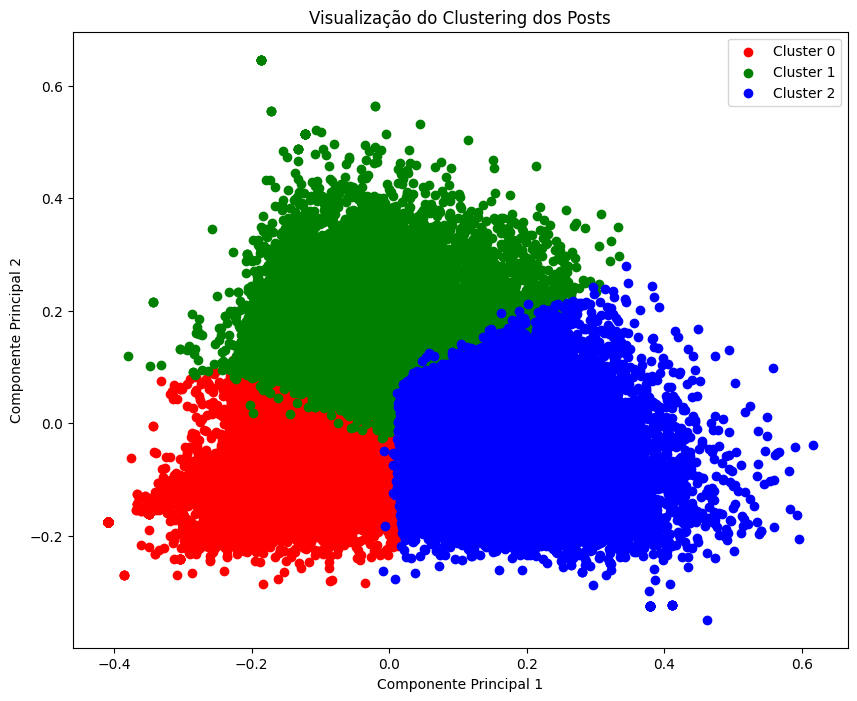

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np  # Certifique-se de que numpy está importado

# Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
# Corrigindo a conversão de sparse para dense e usando np.asarray para evitar o TypeError
reduced_X = pca.fit_transform(np.asarray(X.todense()))

# Plotando os clusters
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']  # Supondo que você tenha 3 clusters correspondendo a cores
for i, color in enumerate(colors):
    plt.scatter(reduced_X[clusters == i, 0], reduced_X[clusters == i, 1], c=color, label=f"Cluster {i}")
plt.title('Visualização do Clustering dos Posts')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


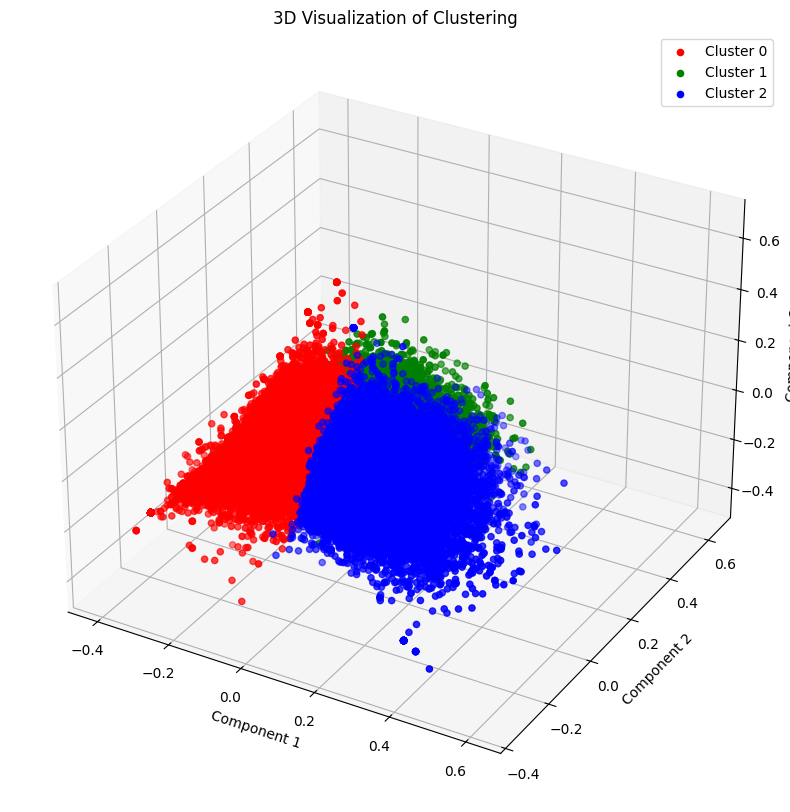

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# Aumentando o número de componentes
pca = PCA(n_components=3)
reduced_X_3d = pca.fit_transform(np.asarray(X.todense()))

# Plotando em 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    ax.scatter(reduced_X_3d[clusters == i, 0], reduced_X_3d[clusters == i, 1], reduced_X_3d[clusters == i, 2], c=color, label=f"Cluster {i}")
ax.set_title('3D Visualization of Clustering')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.show()


## Análise dos Clusters

Para entender melhor cada cluster, identificamos as palavras mais representativas de cada cluster, baseando-nos nos centróides dos clusters.


In [17]:
# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_

# Obter as palavras mais representativas de cada cluster
terms = vectorizer.get_feature_names_out()
num_top_words = 10

for i in range(num_clusters):
    print(f"Cluster {i}")
    # Obter as palavras com os maiores valores no centróide
    top_indices = centroids[i].argsort()[-num_top_words:][::-1]
    top_words = [terms[index] for index in top_indices]
    print("Palavras mais representativas:", top_words)
    print()


Cluster 0
Palavras mais representativas: ['vp', 'co2', 'http', 'did', 'like', 'data', 'think', 'yes', 'time', 'does']

Cluster 1
Palavras mais representativas: ['warming', 'climate', 'global', 'change', 'co2', 'man', 'http', 'years', 'temperature', 'weather']

Cluster 2
Palavras mais representativas: ['science', 'just', 'know', 'does', 'like', 'think', 'people', 'believe', 'say', 'did']

